In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
from nltk.tokenize.regexp import RegexpTokenizer
warnings.filterwarnings("ignore")


In [36]:
data = pd.read_csv("data/salary_data_cleaned.csv")
data.head(10)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,95.0,CyrusOne\n,TX,1,20,1,0,0,1,1
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,73.5,ClearOne Advantage\n,MD,1,12,0,0,0,0,1
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,114.0,Logic20/20\n,CA,0,15,1,0,1,1,1
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,61.0,Rochester Regional Health\n,NY,1,6,0,0,0,0,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,140.0,<intent>\n,NY,1,11,1,0,1,0,0


In [37]:
#### Cleaning
def clean_text(text : str) -> str:
    """
    Cleans the input text by keeping only alphanumeric characters, spaces, and newline characters (\n).
    Args:
        text (str): The input text to clean.
    Returns:
        str: The cleaned text.
    """
    # Define a regex pattern to match alphanumeric characters, spaces, and newlines
    pattern = r"[^a-zA-Z0-9\s\n'’]"
    # Substitute all non-matching characters with an empty string
    cleaned_text = re.sub(pattern, "", text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

data["Job Description"] = data["Job Description"].apply(clean_text)
data.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),data scientist\nlocation albuquerque nm\neduca...,3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),what you will do\n\ni general summary\n\nthe h...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),knowbe4 inc is a high growth information secur...,4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),organization and job id\njob id 310709\n\ndire...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),data scientist\naffinity solutions marketing ...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1
5,Data Scientist,$71K-$119K (Glassdoor est.),cyrusone is seeking a talented data scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,95.0,CyrusOne\n,TX,1,20,1,0,0,1,1
6,Data Scientist,$54K-$93K (Glassdoor est.),job description\n\nplease only local candidate...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,73.5,ClearOne Advantage\n,MD,1,12,0,0,0,0,1
7,Data Scientist,$86K-$142K (Glassdoor est.),advanced analytics lead data scientist\noverv...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,114.0,Logic20/20\n,CA,0,15,1,0,1,1,1
8,Research Scientist,$38K-$84K (Glassdoor est.),summary\n\nthe research scientist i will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,61.0,Rochester Regional Health\n,NY,1,6,0,0,0,0,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company our work is powered b...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,140.0,<intent>\n,NY,1,11,1,0,1,0,0


In [43]:
### Tokenization
tokenizer = RegexpTokenizer(r"[A-Za-z]+(?:’[A-Za-z]+)?|\$[\d\.]+|\S+")

data["tokens"] = data["Job Description"].apply(tokenizer.tokenize)



In [53]:
### Stop words

from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stop_words = stop_words + [i.replace("'","’") for i in stop_words.copy() if "'" in i]

data["tokens_clean"] = data["tokens"].apply(lambda x : [i for i in x if i not in stop_words])
data["tokens_clean"]

0      [data, scientist, location, albuquerque, nm, e...
1      [general, summary, healthcare, data, scientist...
2      [knowbe, 4, inc, high, growth, information, se...
3      [organization, job, id, job, id, 310709, direc...
4      [data, scientist, affinity, solutions, marketi...
                             ...                        
737    [site, name, usa, massachusetts, cambridge, po...
738    [challenge, eventbrite, worldclass, data, repo...
739    [auton, lab, carnegie, mellon, university, lar...
740    [data, science, managerresponsibilities, overs...
741    [returning, candidate, log, back, career, port...
Name: tokens_clean, Length: 742, dtype: object

In [56]:
#### Lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

data["lemmas"] = data["tokens_clean"].apply(lambda x: [lemmatizer.lemmatize(i, pos = "v") for i in x])
data["lemmas"]

0      [data, scientist, location, albuquerque, nm, e...
1      [general, summary, healthcare, data, scientist...
2      [knowbe, 4, inc, high, growth, information, se...
3      [organization, job, id, job, id, 310709, direc...
4      [data, scientist, affinity, solutions, market,...
                             ...                        
737    [site, name, usa, massachusetts, cambridge, po...
738    [challenge, eventbrite, worldclass, data, repo...
739    [auton, lab, carnegie, mellon, university, lar...
740    [data, science, managerresponsibilities, overs...
741    [return, candidate, log, back, career, portal,...
Name: lemmas, Length: 742, dtype: object

In [57]:
### Combining all

data["final_text"] = data["lemmas"].apply(lambda x : " ".join(x))

In [122]:
### Machine learning model

from sklearn.model_selection import train_test_split

x = data["final_text"]
y = data["avg_salary"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x_training , x_val, y_training, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=123)
print(x_training.shape, x_test.shape, x_val.shape)

(533,) (149,) (60,)


In [123]:
### Vectorizing

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=1000)

x_train_vect = vect.fit_transform(x_training)
x_val_vect = vect.transform(x_val)
x_test_vect = vect.transform(x_test)

In [200]:
### Modeling


from catboost import CatBoostRegressor, Pool
train_pool = Pool(x_train_vect, y_training)
eval_pool = Pool(x_val_vect, y_val)
params = {
    "learning_rate": 0.1,
    "iterations": 10000,
    "depth": 5,
    "verbose": False,
    "l2_leaf_reg": 0.1
}
model = CatBoostRegressor(**params )
model.fit(train_pool, early_stopping_rounds = 100, eval_set = eval_pool)

In [201]:
### Evaluating model

from sklearn.metrics import mean_absolute_error, mean_squared_error

preds = model.predict(x_test_vect)
print("MAE:", mean_absolute_error(y_test, preds))
print("MSE:", mean_squared_error(y_test, preds))

MAE: 12.108179285035007
MSE: 474.56280202848484


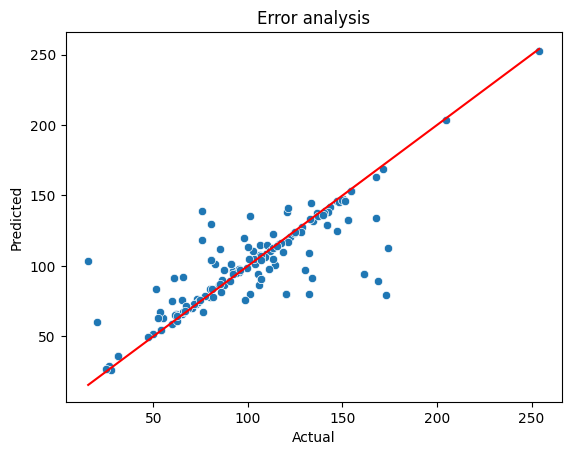

In [202]:
### Analyzing errors

import seaborn as sns

sns.scatterplot(x=y_test, y=preds)
sns.lineplot(x=y_test, y=y_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Error analysis")
plt.show()

In [198]:
### Cross validation

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(x_train_vect)

mae_cross_validation = []
mse_cross_validation = []
mae_training_cross_validation = []
for i, (train_index, test_index) in enumerate(kf.split(x_train_vect)):
    model.fit(x_train_vect.toarray()[train_index], y_training.values[train_index], early_stopping_rounds = 100, eval_set = eval_pool)
    preds = model.predict(x_train_vect.toarray()[test_index])
    preds_training = model.predict(x_train_vect.toarray()[train_index])
    mae = mean_absolute_error(y_training.values[test_index], preds)
    mae_training = mean_absolute_error(y_training.values[train_index], preds_training)
    mae_cross_validation.append(mae)
    mae_training_cross_validation.append(mae_training)
    mse = mean_squared_error(y_training.values[test_index], preds)
    mse_cross_validation.append(mse)

In [203]:
### Analyzing cross validation results

print(mae_cross_validation)
print(mae_training_cross_validation)

[12.945602931476664, 16.615964004738522, 14.286125950408715, 15.206129308315935, 14.096101898824157]
[2.918259347456496, 3.807250656289226, 3.8429611149739356, 1.8060114879345237, 2.9688773657921934]


In [209]:
### Hyperparameter tuning
import optuna


def objective(trial):
    # Define the hyperparameter search space
    params = {
        "iterations" : 10000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "verbose": False,  # Disable logging
        "random_seed": 123,  # Set a fixed random seed for reproducibility
    }
    model = CatBoostRegressor(**params )
    kf = KFold(n_splits=5)
    kf.get_n_splits(x_train_vect)

    mae_cross_validation = []
    mse_cross_validation = []
    mae_training_cross_validation = []
    for i, (train_index, test_index) in enumerate(kf.split(x_train_vect)):
        model.fit(x_train_vect.toarray()[train_index], y_training.values[train_index], early_stopping_rounds = 100, eval_set = eval_pool)
        preds = model.predict(x_train_vect.toarray()[test_index])
        preds_training = model.predict(x_train_vect.toarray()[train_index])
        mae = mean_absolute_error(y_training.values[test_index], preds)
        mae_training = mean_absolute_error(y_training.values[train_index], preds_training)
        mae_cross_validation.append(mae)
        mae_training_cross_validation.append(mae_training)
        mse = mean_squared_error(y_training.values[test_index], preds)
        mse_cross_validation.append(mse)

    mae_val = np.mean(mae_training_cross_validation)
    mae_test = np.mean(mae_cross_validation)
    return abs(mae_val - mae_test)

study = optuna.create_study(direction="minimize")  # Minimize overfitting
study.optimize(objective, n_trials=20)

[I 2025-02-03 21:47:37,145] A new study created in memory with name: no-name-8e5b6a4e-0955-4ff0-8594-0a8e81b7367a
[I 2025-02-03 21:47:45,220] Trial 0 finished with value: 11.730435844287582 and parameters: {'learning_rate': 0.08730421658057548, 'depth': 6, 'l2_leaf_reg': 0.005546622414585943, 'random_strength': 2.2144237093938153, 'bagging_temperature': 0.9196359628702854, 'border_count': 103, 'min_data_in_leaf': 13}. Best is trial 0 with value: 11.730435844287582.
[I 2025-02-03 21:48:21,867] Trial 1 finished with value: 11.539637043911382 and parameters: {'learning_rate': 0.019201773151707364, 'depth': 8, 'l2_leaf_reg': 0.008004156019599203, 'random_strength': 2.6656096147060393, 'bagging_temperature': 0.9336352530437038, 'border_count': 79, 'min_data_in_leaf': 64}. Best is trial 1 with value: 11.539637043911382.
[I 2025-02-03 21:48:31,622] Trial 2 finished with value: 11.953755370649041 and parameters: {'learning_rate': 0.03696407668927832, 'depth': 7, 'l2_leaf_reg': 0.00211172593015

In [213]:
best_params = {
    'learning_rate': 0.010004323405318344,
     'depth': 4,
     'l2_leaf_reg': 0.49946428453675523,
     'random_strength': 0.10560927281613303,
     'bagging_temperature': 0.27154199895296605,
     'border_count': 34,
     'min_data_in_leaf': 45,
    "verbose": False,  # Disable logging
    "random_seed": 123,
}

kf = KFold(n_splits=5)
kf.get_n_splits(x_train_vect)
model = CatBoostRegressor(**best_params )
mae_cross_validation = []
mse_cross_validation = []
mae_training_cross_validation = []
for i, (train_index, test_index) in enumerate(kf.split(x_train_vect)):
    model.fit(x_train_vect.toarray()[train_index], y_training.values[train_index], early_stopping_rounds = 100, eval_set = eval_pool)
    preds = model.predict(x_train_vect.toarray()[test_index])
    preds_training = model.predict(x_train_vect.toarray()[train_index])
    mae = mean_absolute_error(y_training.values[test_index], preds)
    mae_training = mean_absolute_error(y_training.values[train_index], preds_training)
    mae_cross_validation.append(mae)
    mae_training_cross_validation.append(mae_training)
    mse = mean_squared_error(y_training.values[test_index], preds)
    mse_cross_validation.append(mse)

In [217]:
print(mae_cross_validation)
print(mae_training_cross_validation)

model.fit(train_pool, early_stopping_rounds = 100, eval_set = eval_pool)
preds = model.predict(x_test_vect)
print("MAE:", mean_absolute_error(y_test, preds))
print("MSE:", mean_squared_error(y_test, preds))

[15.57781217432308, 17.709863172580583, 16.563037231317818, 16.881745241553986, 16.837206873823693]
[7.430223064237758, 7.490884940444767, 7.894743288217486, 6.920251560973538, 7.311980102662681]
MAE: 15.974327842141818
MSE: 517.3024509889265


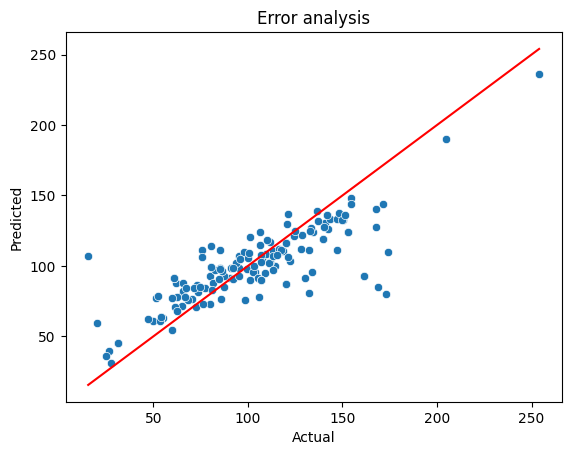

In [218]:
sns.scatterplot(x=y_test, y=preds)
sns.lineplot(x=y_test, y=y_test, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Error analysis")
plt.show()